## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## LOADING DATASETS

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
submission = pd.read_csv("SampleSubmission.csv")

#### COMBINING THE DATASETS

In [4]:
data = pd.concat([train,test],sort=False).reset_index(drop=True)

## UNDERSTANDING THE DATASET (EDA)

In [5]:
data.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       28648 non-null  object 
 1   country                                  28648 non-null  object 
 2   year                                     28648 non-null  int64  
 3   urban_or_rural                           28648 non-null  object 
 4   ghsl_water_surface                       28648 non-null  float64
 5   ghsl_built_pre_1975                      28648 non-null  float64
 6   ghsl_built_1975_to_1990                  28648 non-null  float64
 7   ghsl_built_1990_to_2000                  28648 non-null  float64
 8   ghsl_built_2000_to_2014                  28648 non-null  float64
 9   ghsl_not_built_up                        28648 non-null  float64
 10  ghsl_pop_density                         28648

In [7]:
data.shape

(28648, 19)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,28648.0,2010.271537,4.553145,1994.000000,2008.000000,2011.000000,2014.000000,2016.000000
ghsl_water_surface,28648.0,0.027018,0.095199,0.000000,0.000000,0.000000,0.000000,0.991100
ghsl_built_pre_1975,28648.0,0.041010,0.118721,0.000000,0.000000,0.000160,0.008011,0.894608
ghsl_built_1975_to_1990,28648.0,0.027820,0.072850,0.000000,0.000000,0.000602,0.010037,0.685010
ghsl_built_1990_to_2000,28648.0,0.013713,0.034208,0.000000,0.000037,0.000936,0.008823,0.515534
ghsl_built_2000_to_2014,28648.0,0.018369,0.040241,0.000000,0.000109,0.001727,0.015209,0.649159
ghsl_not_built_up,28648.0,0.872069,0.242707,0.000859,0.895615,0.992725,0.999592,1.000000
ghsl_pop_density,28648.0,95.101508,210.079701,0.000000,2.943082,16.424158,64.364772,1902.876955
landcover_crops_fraction,28648.0,21.097237,16.309999,0.000000,6.105505,19.297194,33.199903,80.064918
landcover_urban_fraction,28648.0,14.079153,23.917510,0.000000,0.705307,2.599028,13.063126,98.784092


In [9]:
data.skew().T

year                                      -1.258741
ghsl_water_surface                         4.539743
ghsl_built_pre_1975                        3.817788
ghsl_built_1975_to_1990                    3.801689
ghsl_built_1990_to_2000                    4.787101
ghsl_built_2000_to_2014                    3.897848
ghsl_not_built_up                         -2.111417
ghsl_pop_density                           3.693075
landcover_crops_fraction                   0.520794
landcover_urban_fraction                   2.009309
landcover_water_permanent_10km_fraction    6.799032
landcover_water_seasonal_10km_fraction     8.674562
nighttime_lights                           6.292776
dist_to_capital                            2.104264
dist_to_shoreline                          0.431829
Target                                     0.665610
dtype: float64

In [10]:
corr=data.corr()["Target"]
corr[np.argsort(corr, axis=0)[::-1]]

Target                                     1.000000
landcover_urban_fraction                   0.666768
nighttime_lights                           0.550703
ghsl_pop_density                           0.525206
ghsl_built_1975_to_1990                    0.500753
ghsl_built_pre_1975                        0.450119
ghsl_built_2000_to_2014                    0.429262
ghsl_built_1990_to_2000                    0.425059
ghsl_water_surface                         0.182816
year                                       0.115014
landcover_water_seasonal_10km_fraction     0.066462
landcover_water_permanent_10km_fraction    0.017210
dist_to_capital                           -0.235850
landcover_crops_fraction                  -0.253550
dist_to_shoreline                         -0.321828
ghsl_not_built_up                         -0.580670
Name: Target, dtype: float64

## VISUALIZING THE DATASET

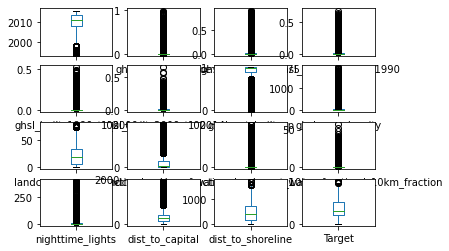

In [11]:
## univiriant
data.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False)
plt.show()

In [12]:
###Multivariate Plots
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(data)
#plt.show()

In [13]:
data.isnull().any()

ID                                         False
country                                    False
year                                       False
urban_or_rural                             False
ghsl_water_surface                         False
ghsl_built_pre_1975                        False
ghsl_built_1975_to_1990                    False
ghsl_built_1990_to_2000                    False
ghsl_built_2000_to_2014                    False
ghsl_not_built_up                          False
ghsl_pop_density                           False
landcover_crops_fraction                   False
landcover_urban_fraction                   False
landcover_water_permanent_10km_fraction    False
landcover_water_seasonal_10km_fraction     False
nighttime_lights                           False
dist_to_capital                            False
dist_to_shoreline                          False
Target                                      True
dtype: bool

In [14]:
data.duplicated().any()

False

## Encoding the categorical features




In [15]:
#import preprocessing module 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['urban_or_rural'] = le.fit_transform(data['urban_or_rural'])
data['country'] = le.fit_transform(data['country'])

In [16]:
## convert float dtypes to int
data["year"] = data['year'].astype('float')
data["urban_or_rural"] = data['urban_or_rural'].astype('float')
data["country"] = data['country'].astype('float')

In [17]:
data.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,7.0,2016.0,0.0,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,7.0,2005.0,0.0,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,14.0,2009.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,12.0,2015.0,0.0,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,9.0,2012.0,1.0,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [18]:
## CHECKING THE CORRELATIONAL AFTER ENCONDING & DATA TYPE CONVERSION
corr=data.corr()["Target"]
corr[np.argsort(corr, axis=0)[::-1]]

Target                                     1.000000
urban_or_rural                             0.678187
landcover_urban_fraction                   0.666768
nighttime_lights                           0.550703
ghsl_pop_density                           0.525206
ghsl_built_1975_to_1990                    0.500753
ghsl_built_pre_1975                        0.450119
ghsl_built_2000_to_2014                    0.429262
ghsl_built_1990_to_2000                    0.425059
ghsl_water_surface                         0.182816
year                                       0.115014
landcover_water_seasonal_10km_fraction     0.066462
landcover_water_permanent_10km_fraction    0.017210
country                                   -0.016650
dist_to_capital                           -0.235850
landcover_crops_fraction                  -0.253550
dist_to_shoreline                         -0.321828
ghsl_not_built_up                         -0.580670
Name: Target, dtype: float64

In [28]:
#Removal of higher corrolated features >0.5
data.drop(['urban_or_rural','landcover_urban_fraction','nighttime_lights','ghsl_pop_density','ghsl_built_1975_to_1990'],1,inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       28648 non-null  object 
 1   country                                  28648 non-null  float64
 2   year                                     28648 non-null  float64
 3   ghsl_water_surface                       28648 non-null  float64
 4   ghsl_built_pre_1975                      28648 non-null  float64
 5   ghsl_built_1990_to_2000                  28648 non-null  float64
 6   ghsl_built_2000_to_2014                  28648 non-null  float64
 7   ghsl_not_built_up                        28648 non-null  float64
 8   landcover_crops_fraction                 28648 non-null  float64
 9   landcover_water_permanent_10km_fraction  28648 non-null  float64
 10  landcover_water_seasonal_10km_fraction   28648

In [30]:
## separating data into train and test

train=data[data.Target.notnull()].reset_index(drop=True)
test=data[data.Target.isna()].reset_index(drop=True)

In [31]:
train.shape , test.shape

((21454, 14), (7194, 14))

#### FEATURE SELECTION

In [32]:
feat_cols = train.drop(["ID","Target"],1)
cols = feat_cols.columns
target=train["Target"]

In [33]:
train[cols].shape , target.shape

((21454, 12), (21454,))

### MODELLING

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train[cols],target, test_size=0.20, random_state = 2021)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(17163, 12) (17163,)
(4291, 12) (4291,)


In [36]:
from xgboost import XGBRegressor

In [37]:
#instatiate the model
xgb=XGBRegressor(objective ='reg:linear', n_estimators= 100, colsample_bynode = 0.8, learning_rate = 0.02,max_depth =  7)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

#Evaluation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Using scikit-lean, the error is {}'.format(mae))

[18:26:06] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
Using scikit-lean, the error is 0.0926232170100916


In [38]:
#Prediction
pred = test[cols]
predictions_xgb  = xgb.predict(pred)

In [39]:
predictions_xgb

array([0.20208716, 0.23920254, 0.59922755, ..., 0.33329573, 0.2470805 ,
       0.49628353], dtype=float32)

In [40]:
#Formating submission
submission = pd.DataFrame({'ID': test.ID, 'Target': predictions_xgb}) # Creating a submission file
filename = 'x3_sub.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: x3_sub.csv


In [41]:
submission

,ID,Target
0,ID_AAcismbB,0.202087
1,ID_AAeBMsji,0.239203
2,ID_AAjFMjzy,0.599228
3,ID_AAmMOEEC,0.258925
4,ID_ABguzDxp,0.269207
...,...,...
7189,ID_zxzKJCMI,0.219775
7190,ID_zyBrpgRp,0.260011
7191,ID_zyMafcYq,0.333296
7192,ID_zyfMsHMG,0.247081
